## FHNW Machine Learning - FS2024

In [55]:
# DO NOT EDIT THIS CELL
# ADD IMOPRTS IN ASSIGNMENT CELLS

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML

InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Bewertete Aufgabe 01

**Ausgabe:** Montag 4.3.2024

**Abgabe:** Montag 25.3.2024 23:59 Uhr


## Vorgaben zu Umsetzung und Abgabe

- Die Algorithmen müssen auf der Basis von Array Operationen selber implementiert werden.
- Der Code muss lauffähig sein bei Ausführung im Docker-Container zum Repo oder auf JHub. 
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in in Ihrem Fork des Repos.  

- **Bitte löschen, kopieren, duplizieren, splitten und verschieben Sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen (nur via **insert new cell**).
- Laufzeit vom Notebook: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**


### Module

Neben den Python-Basismodulen dürfen Sie die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn`,  `tqdm` (für Progress-Bars).

Sie dürfen auch generell [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html), [sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) und [sklearn.compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) benutzen.

Zusätzliche Module dürfen Sie nur verwenden wenn ausdrücklich erwähnt oder bereits vorgegeben in der Code-Cell.

## Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Der Schweizer Bauernverband hat immer mehr Bäuerinnen und Bauern welche Heidelbeeren anbauen. Mittlerweilen sind es schweizweit ca 150 Fussballfelder. Der Bedarf an Heidelbeeren ist stark gewachsen, man kommt mit der Produktion kaum nach. Es gibt dabei starke Konkurrenz aus dem Ausland. Der Bauernverband und viele Konsumentinnen und Konsumenten möchten aber schweizer Heidelbeeren auf dem Tisch. Der Bauernverband hat für die Heidelbeerproduzenten eine Untersuchung gestartet um herauszufinden, welche Faktoren die Ernte beeinflussen. Man möchte die Produzenten dabei unterstützen die Ernte zu maximieren und auch die voraussichtliche Ernte vorherzusagen. 

Der Bauernverband hat bei verschiedenen Produzenten über die vergangenen Jahre Daten erhoben hat. Nun hat der Verband Alex beauftragt ein Modell zu erstellen um den Zusammenhang zwischen Ernte und verschiedenen Faktoren zu modellieren. Mit diesem Modell erhofft man sich weitere Erkenntnisse. In einem ersten Schritt geht es darum eine möglichst akkurate Vorhersage der Ernte zu ermöglichen.

Die folgende Tabelle zeigt die vorhandenen Daten. Pro Heidelbeer-Feld hat man folgende Daten über die Saison erhoben:


| Spalte        | Erklärung                                                                      |
|---------------|--------------------------------------------------------------------------------|
| Id            | Eindeutige Identifikationsnummer für jede Beobachtung                          |
| Klongrösse    | Die durchschnittliche Grösse der Heidelbeerkolonie im Feld  ($m^2$)            |
| Honigbiene    | Dichte der Honigbienen im Feld (Bienen pro Quadratmeter pro Minute)            |
| Hummeln       | Dichte der Hummeln im Feld (Hummeln pro Quadratmeter pro Minute)               |
| AvgTempHoch   | Durchschnitt der täglichen maximalen Lufttemperatur während der Blütezeit (C°) |
| AvgTief       | Durchschnitt der täglichen minimalen Lufttemperatur während der Blütezeit (C°) |
| Regentage     | Gesamtzahl der Tage während der Blütezeit mit Niederschlag                     |
| Fruchtansatz  | Prozentsatz der Blüten, die zu Früchten werden (0-1)                           |
| Fruchtmasse   | Gewicht der einzelnen Frucht (g)                                               |
| Samen         | Anzahl der Samen pro Frucht                                                    |
| Ertrag        | Gesamtertrag der Heidelbeerernte (kg/ha)                                       |



Die Aufgabe besteht darin Alex zu unterstützen ein Modell zu entwickeln mit dem der `Ertrag` vorhergesagt werden kann.

## Aufgabe 1 (6 Punkte)

Bevor man einen Datensatz modelliert ist es wichtig diesen zu untersuchen und kennenzulernen. Benutzen Sie ihre Kenntnisse aus _dsp_ um die Daten einzulesen, zu untersuchen und zu visualisieren.

### Aufgabe 1 a

Unternehmen Sie die folgenden Schritte:
    
- Lesen Sie den Datensatz `heidelbeere_train.csv` ein und verschaffen Sie sich einen groben Überblick.
- Berechnen und zeigen Sie wichtige Kennzahlen.
- Visualisieren Sie jede Variable mit einem sinnvollen Plot. Berücksichtigen Sie dabei die Fragestellung.


Versetzen Sie sich in Ihre Lage: Sie kennen den Datensatz nicht und müssen nun so viele Erkenntnisse wie nötig erhalten, damit Sie die Daten verstehen und modellieren können. Ausserdem möchten Sie abschätzen können welche Variablen wichtig sein könnten und wie man Variablen allenfalls prozessieren muss.

Beispiel-Datensätze:


,Id,Klongrösse,Honigbiene,Hummeln,AvgTempHoch,AvgTief,Regentage,Fruchtansatz,Fruchtmasse,Samen,Ertrag
0,102,12.5,0.25,0.250,26.111111,13.277778,1.00,0.590337,0.493534,41.176421,7.301106
1,760,20.0,0.00,0.202,22.166667,10.444444,3.77,0.492760,0.443520,35.311957,5.718408
2,294,12.5,0.25,0.250,26.111111,13.277778,1.00,0.603372,0.500654,42.131538,7.675964
3,437,12.5,0.25,0.380,26.111111,13.277778,16.00,0.627442,0.519045,44.390944,8.254127
4,453,12.5,0.25,0.380,26.111111,13.277778,16.00,0.608340,0.504234,42.485953,7.616706


Anzahl Datensätze: 543

Kennzahlen zu den Features:


,feature,dtype,missing_values,min,max,mean,median,std,amount_unique_values,correlation_coefficient_with_ertrag
0,Klongrösse,float64,0,12.500000,40.000000,18.987109,12.500000,7.073404,5,-0.534269
1,Honigbiene,float64,0,0.000000,18.430000,0.425037,0.250000,1.104117,6,-0.030863
2,Hummeln,float64,0,0.000000,0.585000,0.283746,0.250000,0.065247,8,0.324705
3,AvgTempHoch,float64,0,14.555556,26.111111,20.339370,22.166667,4.266396,5,-0.184584
4,AvgTief,float64,0,5.111111,13.277778,9.184878,10.444444,3.010665,5,-0.183785
5,Regentage,float64,0,1.000000,34.000000,18.456169,16.000000,12.152015,5,-0.552893
6,Fruchtansatz,float64,0,0.233554,0.645641,0.501027,0.508104,0.079990,543,0.984571
7,Fruchtmasse,float64,0,0.320727,0.532772,0.445623,0.445383,0.040336,543,0.928948
8,Samen,float64,0,23.412776,46.585105,36.090538,36.148782,4.384937,543,0.960331


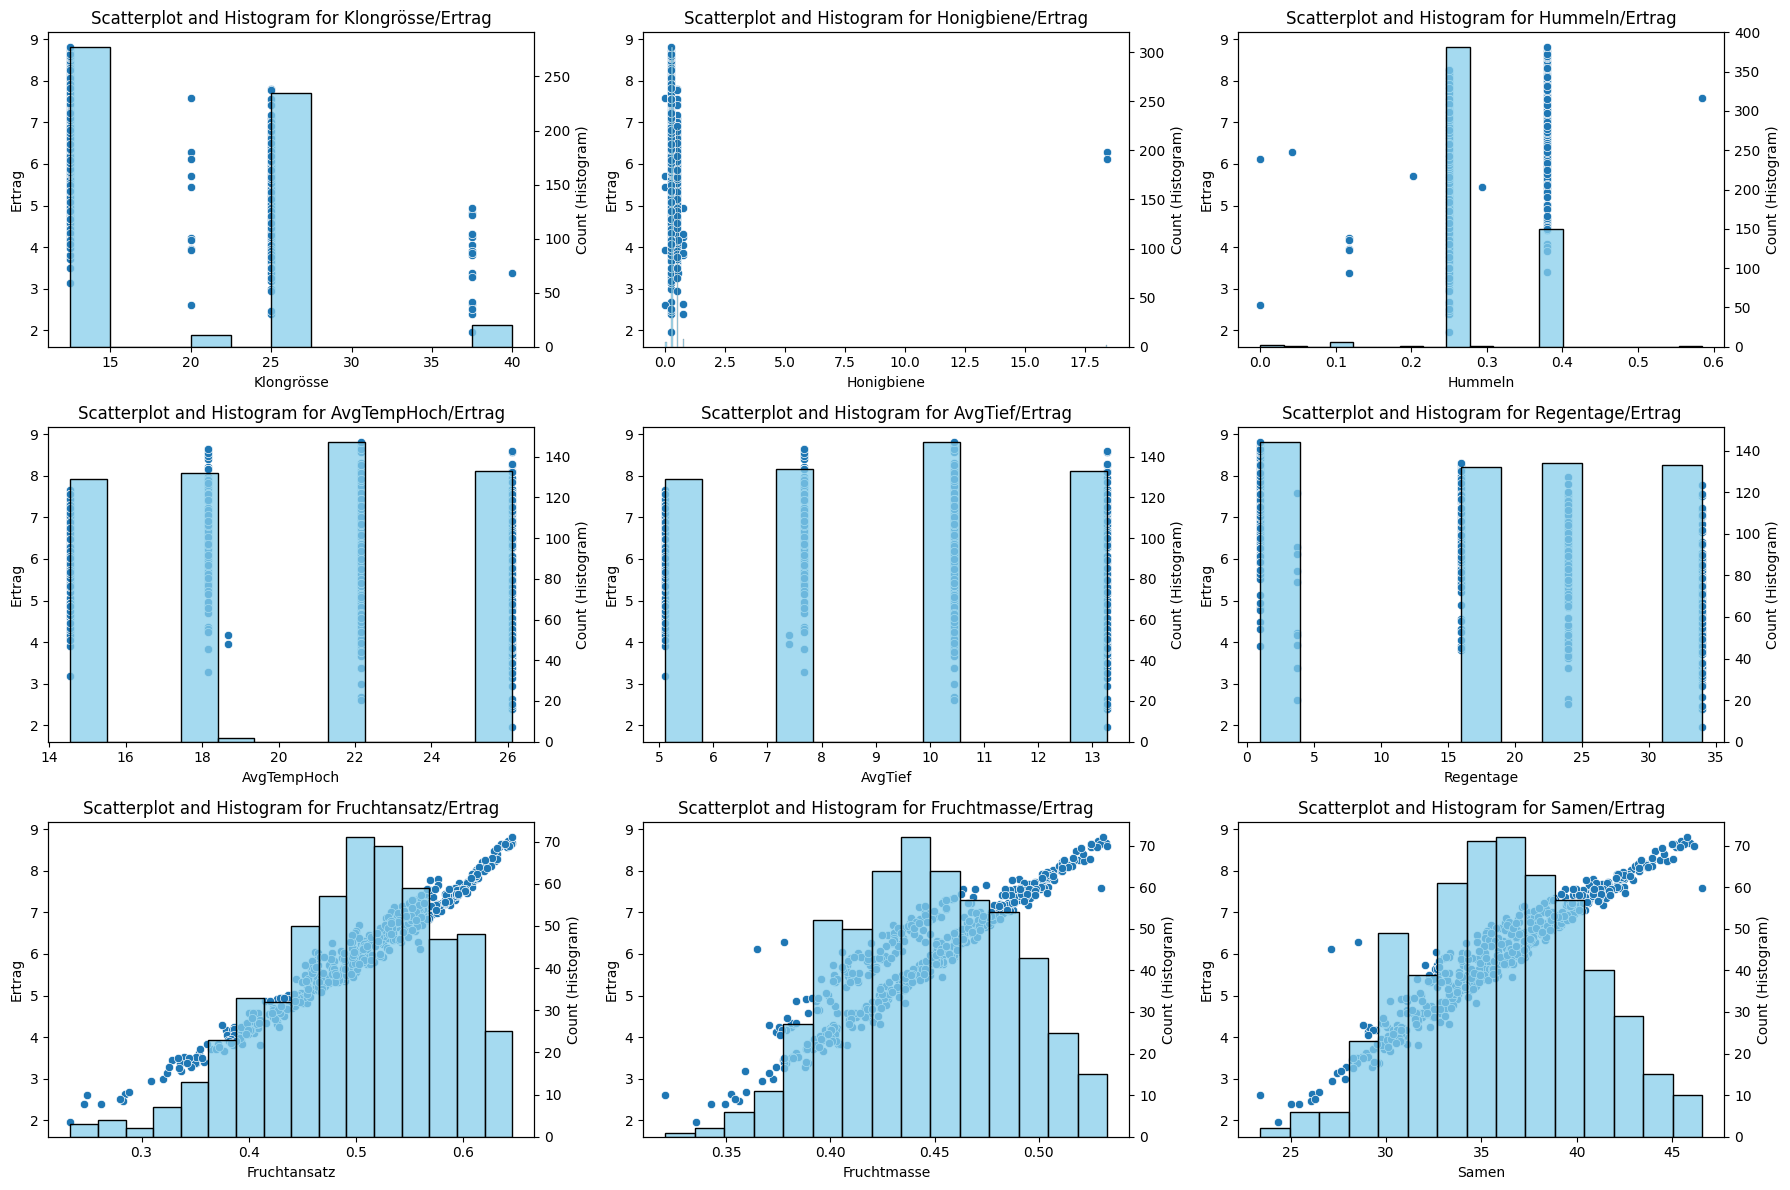

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# load data
df_heidelbeeren = pd.read_csv('heidelbeere_train.csv')

# display data
print(f"Beispiel-Datensätze:")
display(df_heidelbeeren.head())

print(f"Anzahl Datensätze: { df_heidelbeeren.shape[0] }\n")

# calculate important feature specs
features = ['Klongrösse', 'Honigbiene', 'Hummeln', 'AvgTempHoch', 'AvgTief', 'Regentage', 'Fruchtansatz', 'Fruchtmasse', 'Samen']

df_feature_specs = pd.DataFrame(columns=['feature', 'dtype', 'missing_values', 'min', 'max', 'mean', 'median', 'std', 'amount_unique_values', 'correlation_coefficient_with_ertrag'])

for feature in features:
    new_feature_row = {
        'feature': feature,
        'dtype': df_heidelbeeren[feature].dtype,
        'missing_values': df_heidelbeeren[feature].isna().sum(),
        'min': df_heidelbeeren[feature].min(),
        'max': df_heidelbeeren[feature].max(),
        'mean': df_heidelbeeren[feature].mean(),
        'median': df_heidelbeeren[feature].median(),
        'std': df_heidelbeeren[feature].std(),
        'amount_unique_values': df_heidelbeeren[feature].nunique(),
        'correlation_coefficient_with_ertrag': df_heidelbeeren['Ertrag'].corr(df_heidelbeeren[feature])
    }
    df_feature_specs.loc[len(df_feature_specs)] = new_feature_row

print("Kennzahlen zu den Features:")
display(df_feature_specs)

# display columns as scatterplots
number_of_features_to_visualize = len(features)
number_of_rows = math.ceil(number_of_features_to_visualize / 3)
number_of_columns = math.ceil(number_of_features_to_visualize / number_of_rows)

fig, axs = plt.subplots(nrows=number_of_rows, ncols=number_of_columns, figsize=(18, 12))

for index, feature in enumerate(features):
    row = index // number_of_columns
    col = index % number_of_columns

    _ = axs[row, col].set_title(f"Scatterplot and Histogram for {feature}/Ertrag")
    _ = sns.scatterplot(data=df_heidelbeeren, x=feature, y='Ertrag', ax=axs[row, col], zorder=2)
    ax_hist = axs[row, col].twinx()
    _ = ax_hist.set_ylabel('Count (Histogram)')
    _ = sns.histplot(data=df_heidelbeeren, x=feature, ax=ax_hist, color='skyblue', stat='count', zorder=-1)

fig.tight_layout()
plt.show()

### Aufgabe 1 b

Unser Ziel ist es, die Variable `Ertrag` vorherzusagen unter Verwendung der anderen Variablen.  

Was lässt sich über dieses Vorhaben sagen? Diskutieren Sie Ihre Einsichten auf Basis der Analyse in Aufgabe 1a.

Was fällt sonst noch auf in den Daten? Beschreiben und begründen Sie.

In den vorhandenen Daten gibt es keine fehlenden Werte (siehe `missing_values`). Die Variablen befinden sich allerdings in unterschiedlichen Wertebereichen, dies geht aus den hohen Abweichungen von minimalen (`min`) und maximalen (`max`) Werten zwischen den Variablen hervor. Dies könnte bei der Modellierung zu Problemen führen. Deshalb müssen die Variablen wohl auf einen normierten Bereich skalliert werden.

Es fällt auf, dass die Variablen __Fruchtansatz__, __Fruchtmasse__ und __Samen__ kontinuierliche Werte annehmen, wobei die anderen Variablen eher kategorische Werte sind. Dies ist der Spalte `amount_unique_values` zu entnehmen. 

Anhand der Scatterplots und der berechneten Korrelationskoeffizienten (`correlation_coefficient_with_ertrag`) lässt sich sagen, dass die Variablen __Fruchtansatz__, __Fruchtmasse__ und __Samen__ eine starke Korrelation mit dem Ertrag aufweisen. Die anderen Variablen scheinen einen untergeordneten Einfluss auf den Ertrag zu besitzen. Für ein erstes Modell macht es wohl Sinn, die Variablen __Fruchtansatz__, __Fruchtmasse__ und __Samen__ zu verwenden und die anderen Variablen zu vernachlässigen oder diese nur mit einer geringen Gewichtung zu berücksichtigen.

Wenn die Histogramme angeschaut werden, fällt auf, dass bei den "kategorischen" Variablen einige Werte sehr häufig vorkommen, während einige andere Werte nur sehr selten vorkommen. Hier könnte es sich um Ausreisser handeln, die bei der Modellierung berücksichtigt werden müssen.
Die Ausnahme bildet hier die Variable __Hummeln__. Da erkennt man im Histogramm, dass der Wert $0.25$ etwa doppelt so oft vorkommt, wie der Wert $0.38$. Alle anderen Werte der Variable __Hummeln__ kommen nur selten vor.

Bei der Verwendung von __Fruchtansatz__, __Fruchtmasse__ und __Samen__ erwarte ich eine hohe Vorhersagegenauigkeit, da diese Variablen eine starke Korrelation mit dem Ertrag aufweisen.

Die Id Spalte wurde bei der Datenanalyse vernachlässigt, da diese keine Informationen über den Ertrag liefern kann.

## Aufgabe 2 (8 Punkte)

In dieser Aufgabe ist es das Ziel eine regularisierte Lineare Regression zu implementieren (_Ridge Regression_) und die Implementation zu validieren.

### Ridge Regression

Ridge Regression ist eine regularisierte Form ($L_2$-Regularisierung) der Ordinary Least Squares (OLS) Kostenfunktion für die lineare Regression.  

Die Ridge Regression-Kostenfunktion $J(\mathbf{w})$ für einen Datensatz $\cal{D}=\{(\mathbf{x}^{(1)}, y^{(1)}), \dots, (\mathbf{x}^{(n)}, y^{(n)}) \}$ mit $n$ Datenpunkten ist:

\begin{align}
J(\mathbf{w}) &= \frac{1}{2n}\sum_{i=1}^n (y^{(i)} - \mathbf{x}^{(i)T}\mathbf{w})^2 + \Omega(\mathbf{w})
\end{align}

Wobei die Regularisierung $\Omega(\mathbf{w})$ folgendermassen definiert ist:

\begin{align}
\Omega(\mathbf{w}) &= \frac{1}{2}\lambda \sum_{j=1}^p w_j^2 
\end{align}

Der $i$te Datenpunkt $\mathbf{x}^{(i)}$ ist ein Vektor der Dimensionalität $\mathbb{R}^{p +1}$: $\mathbf{x}^{(i)} = \Big(1, x_1^{(i)}, \dots , x_p^{(i)}\Big)$.

$\mathbf{w} = (w_0, \dots, w_p)$ sind dabei die Modellkoeffizienten, $\lambda$ ist die Regularisierungsstärke.


**Beachten Sie:**

- In sklearn wird statt $\lambda$ jeweils $\alpha$ `alpha` als Bezeichnung für die Regularisierungsstärke verwendet (wohl weil `lambda` ein reserviertes Wort ist in Python).

- Um Gradient Descent auszuführen müssen Sie die Kostenfunktion ableiten. Die Vorgehensweise ist in den Kursunterlagen erklärt.

- Coursera verwendet für die Bezeichung der Anzahl Datenpunkte $m$. Hier verwenden wir $n$, was gebräuchlicher ist. Ausserdem: $w$ ist ein Skalar, $\mathbf{w}$ ein Vektor und $\mathbf{W}$ eine Matrix.

- Implementieren Sie alles vektorisiert.


### Stochastic Gradient Descent

Mit _Batch Gradient Descent (BGD)_ berechnet man den Gradienten der Kostenfunktion bezüglich der Modellparameter für jeden _Gradient Descent Step_ mit **allen Datenpunkten**. Damit berechnet man den Gradient exakt. Man kann den Gradient jedoch auch mit einem Subset der Datenpunkte berechnen und den exakten Gradient damit schätzen. Dadurch verringert sich der Rechenaufwand. Mit _Stochastic Gradient Descent (SGD)_ nimmt man nur **einen, zufällig ausgewählten, Datenpunkt** (deshalb _stochastic_) um den Gradient in jeder Iteration zu schätzen. 

Implementieren Sie die Optionen `optimization_method="bgd"` und `optimization_method="sgd"` um das Modell wahlweise mit _BGD_ oder _SGD_ zu optimisieren. 

### Aufgabe 2a
Ergänzen Sie die untenstehende Klasse und deren Methoden. Folgen Sie der Scikit-Learn API ([Link](https://scikit-learn.org/stable/developers/develop.html)): Das bedeutet im Wesentlichen, dass Sie die Methoden implementieren sollen, die in der Klasse schon vorgegeben sind.

Beachten Sie die in den Doc-Strings spezifizierten Angaben, insbesondere auch die der Shapes der Inputs und Outputs der einzelnen Methoden.

Der Estimator soll eine Ridge Regression durchführen. Das Finden der Modell-Koeffizienten soll mit Gradient Descent erfolgen.

In [57]:
from typing import Self

import numpy as np
from sklearn.base import BaseEstimator
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, message="overflow encountered")
warnings.filterwarnings('ignore', category=RuntimeWarning, message="invalid value encountered")


class LinearRegression(BaseEstimator):
    """Linear Regression
    
    Args:
    -----
        epsilon: if norm of gradient falls below epsilon, 
            gradient descent terminates (disable with negative values)  
        max_num_steps: max number of steps for gradient descent
        learning_rate: learning rate for gradient descent
        optimization_method: one of 'bgd' (batch gradient descent),
            'sgd' (stochastic gradient descent)
        alpha: regularization strength (lambda)
        verbose: whether to print progress during model training (optional)
    """

    def __init__(
        self,
        epsilon: float = -1,
        max_num_steps: int = 1000,
        learning_rate: float = 0.1,
        optimization_method: str = "bgd",
        alpha: float = 0.0,
        verbose: bool = True
    ):
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_num_steps = max_num_steps
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.verbose = verbose
        self.history = []

    def fit(self, X: np.ndarray, y: np.ndarray) -> Self:
        """Fit the model coefficients.
        Args:
            X: input data (n, p)
            y: input labels (n, )

        Returns:
            self
        """
        if (X.shape[0] != y.shape[0]):
            raise ValueError("X and y must have the same number of rows")

        self.w_ = np.zeros(X.shape[1] + 1)
        self.history = [] # initialize history (for plotting learning curves)

        if self.verbose:
            progress_bar = tqdm(total=self.max_num_steps, desc="Gradient Descent")

        # print(f"learning_rate: {self.learning_rate}, alpha: {self.alpha}, x.shape: {X.shape}") # DEBUG
        for step in range(self.max_num_steps):
            gradient = self.gradient(X, y)

            self.w_ -= self.learning_rate * gradient
            self.history.append(self.cost(X, y))

            # return if gradient is nan
            if np.isnan(gradient).any():
                if self.verbose:
                    print(f"Gradient is NaN at step {step}")
                break

            # Check convergence
            if np.linalg.norm(gradient) < self.epsilon:
                if self.verbose:
                    print(f"Converged at step {step}")
                break

            if self.verbose:
                progress_bar.update(1)

        if self.verbose:
            progress_bar.close()

        return self

    def gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate Gradient of Cost Function.
        
        Calculates dJ/dw, while w are the current parameter estimates in self.w_

        Args:
            X: input data (n, p)
            y: input labels (n, )

        Returns:
            dJ/dw gradient vector (p + 1, )
        """
        if (X.shape[0] != y.shape[0]):
            raise ValueError("X and y must have the same number of rows")

        X = np.hstack([np.ones((X.shape[0], 1)), X]) # prepend column of ones for bias term
        n = X.shape[0]

        gradient = None

        if (self.optimization_method == "bgd"):
            gradient = np.mean((y - X @ self.w_) * -X.T, axis=1)

        elif (self.optimization_method == "sgd"):
            i = np.random.randint(0, n)
            gradient = (y[i] - X[i].T @ self.w_) * -X[i]

        gradient += self.alpha * self.w_

        assert gradient.ndim == 1
        return gradient

    def cost(self, X: np.ndarray, y: np.ndarray) -> float:
        """Evaluate the Cost Function.

        Args:
            X: input data (n, p)
            y: input labels (n, )

        Returns:
            total cost
        """
        if (X.shape[0] != y.shape[0]):
            raise ValueError("X and y must have the same number of rows")

        X = np.hstack([np.ones((X.shape[0], 1)), X]) # prepend column of ones for bias term
        n = X.shape[0]

        cost = 0;

        if (self.optimization_method == "bgd"):
            cost = np.mean((y - X @ self.w_) ** 2) / 2

        elif (self.optimization_method == "sgd"):
            i = np.random.randint(0, n)
            cost = (y[i] - X[i].T @ self.w_) ** 2

        cost += (self.alpha / 2) * self.w_ @ self.w_

        assert isinstance(cost, float)
        return cost

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Calculate Predictions.

        Args:
            X: input Data (n, p)
            
        Returns:
            Predictions (n, )
        """
        X = np.hstack([np.ones((X.shape[0], 1)), X]) # prepend column of ones for bias term

        predictions = X @ self.w_

        assert predictions.ndim == 1
        return predictions

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate R^2
        
        See: https://en.wikipedia.org/wiki/Coefficient_of_determination

        Args:
            X: Input Data (n, p)
            y: Input Labels (n, )
        
        Returns:
            R^2
        """
        if (X.shape[0] != y.shape[0]):
            raise ValueError("X and y must have the same number of rows")

        y_pred = self.predict(X)
        y_mean = np.mean(y)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - y_mean) ** 2)
        score = 1 - (ss_res / ss_tot)

        assert isinstance(score, float)
        return score

### Aufgabe 2b
Die folgende Zelle enthält verschiedene Tests die Ihre Implementation prüfen. Sorgen Sie dafür, dass die folgenden Tests erfolgreich sind. Stellen Sie sicher, dass die Input-Shapes der Methoden die Sie implementieren den Doc-Strings entsprechen.

**Achtung: Die Tests decken nicht alles ab. Sie können also nicht davon ausegehen, dass Ihre Implementation korrekt ist sobald die Tests erfolgreich sind.**

Ihre Abgabe wird noch mit weiteren, für Sie nicht sichtbare Tests, geprüft. Es ist grundsätzlich ihre Aufgabe, die Implementation genau zu prüfen. Sie können dazu weitere Zellen mit eigenen Tests einfügen. Sie können jedoch die folgende Zelle nicht ändern. Diese wird nach Abgabe wieder überschrieben, sodass die von mir definierten Tests ausgeführt werden.

In [58]:
import numpy as np
from sklearn.datasets import make_regression


def print_result(test_name, passed, expected, actual):
    status = "Passed" if passed else "Failed"
    print(f"{status} test: {test_name}")
    print(f"----> Expected: {expected}")
    print(f"----> Actual: {actual}")


def run_test_multivariate():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=2, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), w_true])

    lr = LinearRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    lr.fit(Xdummy, ydummy)

    try:
        np.testing.assert_allclose(w_true, lr.w_, atol=1e-3)
        print_result("run_test_multivariate", True, w_true, lr.w_)
    except AssertionError:
        print_result("run_test_multivariate", False, w_true, lr.w_)


def run_test_univariate():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), np.array([w_true])])
    
    lr = LinearRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    lr.fit(Xdummy, ydummy)
    try:
        np.testing.assert_allclose(w_true, lr.w_, atol=1e-3)
        print_result("run_test_univariate", True, w_true, lr.w_)
    except AssertionError:
        print_result("run_test_univariate", False, w_true, lr.w_)


def run_test_score():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    lr = LinearRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    lr.fit(Xdummy, ydummy)
    score = lr.score(Xdummy, ydummy)
    expected_score = 1.0

    try:
        np.testing.assert_almost_equal(score, expected_score, decimal=3)
        print_result("run_test_score", True, expected_score, score)
    except AssertionError:
        print_result("run_test_score", False, expected_score, score)


def run_test_cost():
    Xdummy, ydummy, _ = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    lr = LinearRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    lr.fit(Xdummy, ydummy)
    actual_cost = lr.cost(Xdummy, ydummy)
    expected_cost = 1e-6

    try:
        assert actual_cost < expected_cost
        print_result("run_test_cost", True, f"< {expected_cost}", actual_cost)
    except AssertionError:
        print_result("run_test_cost", False, f"< {expected_cost}", actual_cost)


def run_test_gradient():

    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), np.array([w_true])])

    lr = LinearRegression(alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1)
    lr = lr.fit(Xdummy, ydummy)
    
    expected_gradient = np.array([-6.92655851, -59.01320294])
    weights = np.array([0.0, 0.0])
    lr.w_ = weights
    actual_gradient = lr.gradient(Xdummy, ydummy)
    try:
        np.testing.assert_allclose(actual_gradient, expected_gradient)
        print_result("run_test_gradient", True, expected_gradient, actual_gradient)
    except AssertionError:
        print_result("run_test_gradient", False, expected_gradient, actual_gradient)


for test in [run_test_multivariate, run_test_univariate, run_test_score, run_test_cost, run_test_gradient]:
    try:
        test()
    except Exception as e:
        print(f"Error during testing - test: {test} error: {e}")



Gradient Descent:   0%|          | 0/1000 [00:00<?, ?it/s]

Converged at step 103
Passed test: run_test_multivariate
----> Expected: [ 5.         84.23424376  8.31949883]
----> Actual: [ 5.00059277 84.2337517   8.3198281 ]


Gradient Descent:   0%|          | 0/1000 [00:00<?, ?it/s]

Converged at step 75
Passed test: run_test_univariate
----> Expected: [ 5.         43.08627633]
----> Actual: [ 5.0000003 43.0856769]


Gradient Descent:   0%|          | 0/1000 [00:00<?, ?it/s]

Converged at step 75
Passed test: run_test_score
----> Expected: 1.0
----> Actual: 0.9999999998061698


Gradient Descent:   0%|          | 0/1000 [00:00<?, ?it/s]

Converged at step 75
Passed test: run_test_cost
----> Expected: < 1e-06
----> Actual: 2.451287865990647e-07


Gradient Descent:   0%|          | 0/1000 [00:00<?, ?it/s]

Converged at step 75
Passed test: run_test_gradient
----> Expected: [ -6.92655851 -59.01320294]
----> Actual: [ -6.92655851 -59.01320294]


## Aufgabe 3 (16 Punkte)

In dieser Aufgabe wenden Sie den Algorithmus auf dem Datensatz `heidelbeere_train.csv` an. Damit testen und untersuchen Sie ihre Implementation der Klasse `LinearRegression` und lernen gleichzeitig den Datensatz besser kennen.


### Aufgabe 3a

1) Trainieren Sie ein Modell mit `learning_rate=1.0` (der Rest soll auf den Default-Werten sein). Verwenden Sie ausschliesslich `Fruchtmasse` als Input-Variable um `Ertrag` vorherzusagen. Lassen Sie die Variablen komplett unverändert.
2) Berechnen und zeigen Sie $R^2$ mit der `score()` Methode.
3) Zeigen Sie in einer Tabelle für die ersten 10 Beobachtungen: `y_true` ($\mathbf{y}$), `y_hat` ($\mathbf{\hat{y}}$)und `y_true - y_hat` (das Residuum $\mathbf{r}$). Sie können ein `pd.DataFrame` erstellen und dieses mit `print` anzeigen.
4) Berechnen und zeigen Sie den Wert der Kostenfunktion.

Verwenden Sie `print()` Statements um Fragen nach bestimmten Outputs zu beantworten. Beispiel:

```
print(f"R^2 is: {lr.score(X_train, y_train):.3f}")
```

In [59]:
import pandas as pd

df_heidelbeeren = pd.read_csv('heidelbeere_train.csv')

lr = LinearRegression(learning_rate=1.0);

X_train = df_heidelbeeren['Fruchtmasse'].values.reshape(-1, 1)
y_train = df_heidelbeeren['Ertrag'].values

_ = lr.fit(X_train, y_train)

print(f"R^2 is: {lr.score(X_train, y_train):.3f}")
print(f"cost is: {lr.cost(X_train, y_train):.3f}")

df_observation = pd.DataFrame()
df_observation['y_true'] = y_train[0:10]
df_observation['y_hat'] = lr.predict(X_train[0:10])
df_observation['residuum'] = df_observation['y_true'] - df_observation['y_hat']

print("Observations:")
display(df_observation)

Gradient Descent:   0%|          | 0/1000 [00:00<?, ?it/s]

R^2 is: 0.813
cost is: 0.174
Observations:


,y_true,y_hat,residuum
0,7.301106,7.152953,0.148153
1,5.718408,5.954763,-0.236355
2,7.675964,7.323522,0.352442
3,8.254127,7.764128,0.489999
4,7.616706,7.409290,0.207416
5,7.793442,7.416438,0.377004
6,4.480070,5.210426,-0.730356
7,4.247509,4.463420,-0.215911
8,6.683201,6.619093,0.064107
9,6.060284,5.735064,0.325220


### Aufgabe 3b

Verwenden Sie exakt den Code von Aufgabe 3a. **Ersetzen Sie einzig** die Variable `Fruchtmasse` mit `Samen`. Lassen Sie den Code nochmal laufen.

In [60]:
import pandas as pd

df_heidelbeeren = pd.read_csv('heidelbeere_train.csv')

lr = LinearRegression(learning_rate=1.0);

X_train = df_heidelbeeren['Samen'].values.reshape(-1, 1)
y_train = df_heidelbeeren['Ertrag'].values

_ = lr.fit(X_train, y_train)

print(f"R^2 is: {lr.score(X_train, y_train):.3f}")
print(f"cost is: {lr.cost(X_train, y_train):.3f}")

df_observation = pd.DataFrame()
df_observation['y_true'] = y_train[0:10]
df_observation['y_hat'] = lr.predict(X_train[0:10])
df_observation['residuum'] = df_observation['y_true'] - df_observation['y_hat']

print("Observations:")
display(df_observation)

Gradient Descent:   0%|          | 0/1000 [00:00<?, ?it/s]

Gradient is NaN at step 99
R^2 is: nan
cost is: nan
Observations:


,y_true,y_hat,residuum
0,7.301106,NaN,NaN
1,5.718408,NaN,NaN
2,7.675964,NaN,NaN
3,8.254127,NaN,NaN
4,7.616706,NaN,NaN
5,7.793442,NaN,NaN
6,4.480070,NaN,NaN
7,4.247509,NaN,NaN
8,6.683201,NaN,NaN
9,6.060284,NaN,NaN


Was beobachten Sie? Erklären Sie.

Bei der Aufgabe 3a erhalte ich ein brauchbares Resultat, während bei der Aufgabe 3b das Training nicht konvergiert. Der Grund liegt im Wertebereich der Variable "Samen". Dieser ist zu hoch (Werte liegen zwischen $23.412776$	und $46.585105$) und führt somit zu overflows bei den Berechnungen. Dies ist hier nicht ersichtlich, da ich in meiner `LinearRegression` Implementation frühzeitig abbreche, sobald ein Overflow entsteht - dies ist hier bei Schritt 99 der Fall. Bei der Variable "Fruchtmasse" liegen die Werte zwischen $0.320727$ und $0.532772$ und sind somit deutlich tiefer. Normalisiert/skaliert man aber die Variable "Samen", so konvergiert dieses Modell ebenfalls.

### Aufgabe 3c

Verwenden Sie nun die Variablen `Fruchtmasse` und `Samen` gleichzeitig (_Multivariate Linear Regression_). **Ändern Sie was immer Sie für nötig halten (z.B. Modell-Parameter oder Pre-Processing)** um das Modell erfolgreich und mit möglichst wenig Gradient Descent Updates (steps) zu trainieren. Zeigen Sie mit einer geeigneten Grafik ob Batch Gradient Descent konvergiert hat (z.B. eine _Learning Curve_).

Folgende Parameter von `LinearRegression` sollen Sie verwenden und dürfen nicht geändert werden:
- `epsilon=1e-3`
- `alpha=0`
- `optimization_method="bgd"`
- `max_num_steps=x` wobei $x\le50000$ (damit Sie nicht ewig trainieren)


Versuchen Sie das Abbruchkriterium `Gradient < epsilon` zu erreichen.

Gradient Descent:   0%|          | 0/50000 [00:00<?, ?it/s]

Converged at step 3884
R^2 is: 0.952
cost is 0.045
Observations:


,y_true,y_hat,residuum
0,7.301106,7.457899,-0.156792
1,5.718408,5.555123,0.163285
2,7.675964,7.811399,-0.135435
3,8.254127,8.581782,-0.327655
4,7.616706,7.902694,-0.285988
5,7.793442,7.891099,-0.097657
6,4.480070,4.519412,-0.039342
7,4.247509,4.591708,-0.344199
8,6.683201,6.590247,0.092954
9,6.060284,6.331400,-0.271116


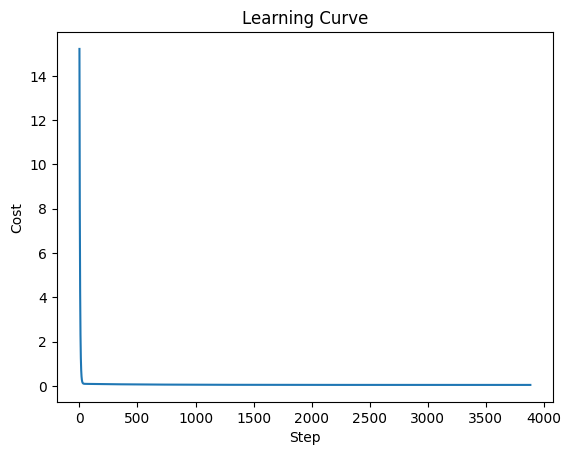

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

df_heidelbeeren = pd.read_csv('heidelbeere_train.csv')

lr = LinearRegression(epsilon=1e-3, max_num_steps=50000, learning_rate=0.1, optimization_method="bgd", alpha=0.0)

X_train = df_heidelbeeren[['Samen', 'Fruchtmasse']]
y_train = df_heidelbeeren['Ertrag'].values

# 1. Option: Normalize data using StandardScaler from sklearn
X_train = StandardScaler().fit(X_train).transform(X_train)
# 2. Option: Normalize data using custom normalization
# X_train = (X_train - X_train.mean()) / X_train.std()
# 3. Option: Normalize data using min-max normalization
# X_train = MinMaxScaler().fit(X_train).transform(X_train)

_ = lr.fit(X_train, y_train)

print(f"R^2 is: {lr.score(X_train, y_train):.3f}")
print(f"cost is {lr.cost(X_train, y_train):.3f}")

df_observation = pd.DataFrame()
df_observation['y_true'] = y_train[0:10]
df_observation['y_hat'] = lr.predict(X_train[0:10])
df_observation['residuum'] = df_observation['y_true'] - df_observation['y_hat']

print("Observations:")
display(df_observation)

_ = plt.plot(lr.history)
_ = plt.title("Learning Curve")
_ = plt.xlabel("Step")
_ = plt.ylabel("Cost")

plt.show()

Is es Ihnen gelungen das Abbruchkriterium zu erreichen? 

Falls Ja: Was war entscheidend?

Falls Nein: Warum nicht? Was hat Sie dem Ziel näher gebracht?

Das Abbruchkriterium wurde nach etwa 3800 Schritten erreicht (Lernrate = $0.1$), mit einer höheren Lernrate konnte die Anzahl benötigter Iterationen sogar noch reduziert werden. Entscheidend, um das Abbruchkriterium zu erreichen, war die Normalisierung der beiden Variablen. Dabei habe ich mehrere Methoden mit erfolgreichem Resultat verwendet. Zum einen habe ich den `StandardScaler` von sklearn.preprocessing verwendet und zum anderen habe ich die Werte manuell mit `X_train = (X_train - X_train.mean()) / X_train.std()` normalisiert. Beide Methoden haben zu den gleichen Resultaten geführt. Dies ist nicht überaschend, da der `StandardScaler` die Werte ebenfalls mit dem Mittelwert und der Standardabweichung normalisiert. Zusätzlich habe ich noch den `MinMaxScaler` verwendet, welcher die Werte auf den Bereich $[0, 1]$ skaliert. Mit dieser Methode konnte das Abbruchkriterium nicht erreicht werden, allerdings waren die erzielten Kosten sowie der $R^2$-Wert sehr ähnlich zu den anderen Methoden.


### Aufgabe 3d

Trainieren Sie nun zwei Modelle. Einmal mit `optimization_method="sgd"` und einmal mit `optimization_method="bgd"`. Sie können die restlichen Parameter selber wählen, sie sollen aber identisch sein für die beiden Modelle.

Zeichnen Sie für beide Modelle eine Learning-Curve. Wählen Sie eine Darstellung die einen einfachen Vergleich erlaubt.


SGD: Converged at step 1000
SGD: R^2 is: 0.942
SGD: cost is 0.000
BGD: Converged at step 1000
BGD: R^2 is: 0.943
BGD: cost is 0.054


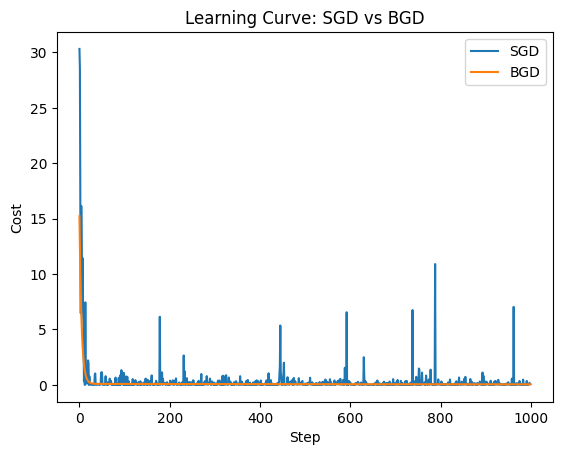

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

df_heidelbeeren = pd.read_csv('heidelbeere_train.csv')

X_train = df_heidelbeeren[['Samen', 'Fruchtmasse']]
y_train = df_heidelbeeren['Ertrag'].values

X_train = StandardScaler().fit(X_train).transform(X_train)

# train model with BGD

lr_sgd = LinearRegression(learning_rate=0.1, optimization_method="sgd", verbose=False)
_ = lr_sgd.fit(X_train, y_train)
_ = plt.plot(lr_sgd.history)

print(f"SGD: Converged at step {len(lr_sgd.history)}")
print(f"SGD: R^2 is: {lr_sgd.score(X_train, y_train):.3f}")
print(f"SGD: cost is {lr_sgd.cost(X_train, y_train):.3f}")

# train model with SGD

lr_bgd = LinearRegression(learning_rate=0.1, optimization_method="bgd", verbose=False)
_ = lr_bgd.fit(X_train, y_train)
_ = plt.plot(lr_bgd.history)

print(f"BGD: Converged at step {len(lr_bgd.history)}")
print(f"BGD: R^2 is: {lr_bgd.score(X_train, y_train):.3f}")
print(f"BGD: cost is {lr_bgd.cost(X_train, y_train):.3f}")

# plot learning curves

_ = plt.legend(["SGD", "BGD"])
_ = plt.title("Learning Curve: SGD vs BGD")
_ = plt.xlabel("Step")
_ = plt.ylabel("Cost")

plt.show()

Wie unterscheiden sich die Learning-Curves? Warum?

Die Learning-Curve bei der Batch-Gradient-Descent Methode ist deutlich glatter als bei der Stochastic-Gradient-Descent Methode. Bei der Batch-Gradient-Descent Methode wird der Gradient anhand aller verfügbaren Datenpunkte berechnet. Dadurch wird der Einfluss eines einzelnen Datenpunktes auf den Gradienten reduziert. Bei der Stochastic-Gradient-Descent Methode wird der Gradient anhand eines zufällig ausgewählten Datenpunktes berechnet. Dadurch kann es zu starken Schwankungen des Gradienten kommen, was sich in der Learning-Curve widerspiegelt.

Wie man jedoch anhand der Kosten sowie des $R^2$-Wertes erkennen kann, sind die Resultate beider Methoden sehr ähnlich (ausser bei gewissen Runs erreichte ich mit SGD deutlich tiefere Kosten, welche sich aufgrund der starken Schwankungen bei SGD erklären lassen). Somit kann man nicht pauschal eine Methode der anderen vorziehen. Bei der Recherche habe ich gelesen, dass beide Methoden ihre Vor- und Nachteile haben. So ist die Stochastic-Gradient-Descent Methode schneller, da der Gradient nur anhand eines Datenpunktes berechnet wird. Die Batch-Gradient-Descent Methode hingegen ist robuster, da der Gradient anhand aller Datenpunkte berechnet wird und Ausreiser so weniger ins Gewicht fallen. Ein guter Kompromiss ist die Mini-Batch-Gradient-Descent Methode, bei der der Gradient anhand einer zufälligen Auswahl von Datenpunkten berechnet wird.

### Aufgabe 3e

Nun untersuchen wir verschiedene Learning-Rates. Verwenden Sie dasselbe Setup wie in Aufgabe 3c. Mit folgenden Parameter:
- `epsilon=-1`
- `alpha=0`
- `optimization_method="bgd"`
- `max_num_steps=500`


Variieren Sie ausschliesslich den `learning_rate` Parameter in einem sinnvollen Bereich. Wählen Sie mind. 10 verschieden Werte. Trainieren Sie mehrere Modelle und vergleichen Sie die Konvergenz der Modelle für jeden Wert von `learning_rate`. Versuchen Sie eine möglichst hohe, funktionierende Learning-Rate zu finden. Erstellen Sie dazu Learning-Curves.

Achten Sie darauf, dass die Darstellung einen sinnvollen Vergleich erlaubt.

C:\Users\Seya.Schmassmann\AppData\Local\Temp\ipykernel_18944\1579057769.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


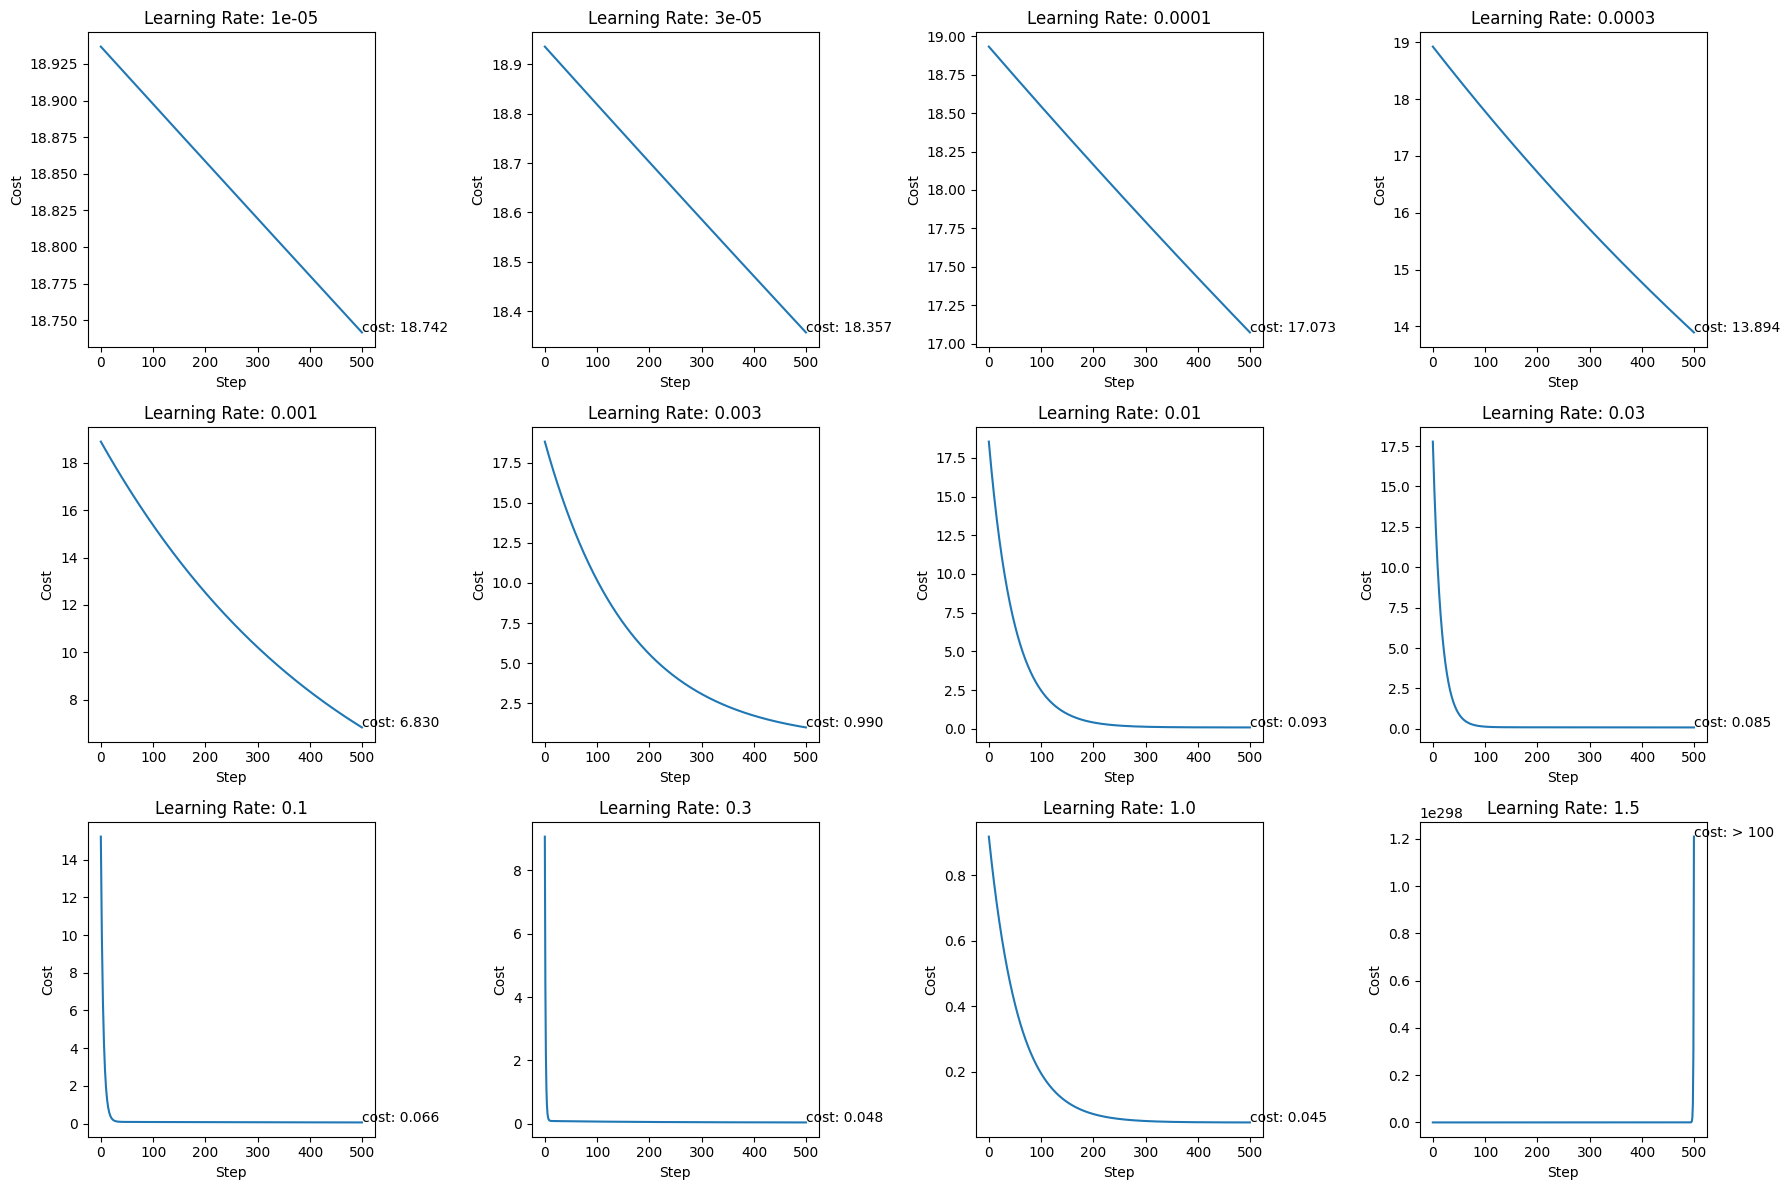

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_heidelbeeren = pd.read_csv('heidelbeere_train.csv')

learning_rates = [ 0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 1.5 ]

X_train = df_heidelbeeren[['Samen', 'Fruchtmasse']]
y_train = df_heidelbeeren['Ertrag'].values

X_train = StandardScaler().fit(X_train).transform(X_train)

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for index, learning_rate in enumerate(learning_rates):
    lr = LinearRegression(epsilon=-1, max_num_steps=500, learning_rate=learning_rate, optimization_method="bgd", alpha=0.0, verbose=False)

    _ = lr.fit(X_train, y_train)

    row = index // 4
    col = index % 4

    _ = axs[row, col].plot(lr.history)
    _ = axs[row, col].set_title(f"Learning Rate: {learning_rate}")
    _ = axs[row, col].set_xlabel("Step")
    _ = axs[row, col].set_ylabel("Cost")
    _ = axs[row, col].text(500, lr.history[499], f"cost: {lr.history[499]:.3f}" if lr.history[499] < 100 else "cost: > 100")

fig.tight_layout()
fig.show()

Interpretieren Sie die Learning-Curves. Was sehen Sie? Welche Learning-Rates funktionieren und sind praktikabel? Welche finden Sie optimal?

Damit das Modell konvergiert, muss die Learning Rate zwingend kleiner oder gleich $1.0$ sein. Je kleiner die Learning Rate gewählt wird, desto weniger schnell konvergiert das Modell. Wenn ich nur die ersten 500 Schritte betrachte, erreiche ich mit einer Learning Rate von $0.001$ die Kosten von $6.83$, während ich mit einer Learning Rate von $1.0$ die Kosten von $0.045$ erreiche (dies ist auch das beste Ergebnis, was ich erzielen konnte). Praktikable Learning Rates für dieses Modell sind zwischen $0.1$ und $1.0$. Die optimale Learning Rate für dieses Modell ist $1.0$, da ich damit die besten Resultate (tiefste Kosten nach 500 Steps) bekommen habe. Es ist zu beachten, dass die y-Achse für alle Learning Rates einen anderen Wertebereich aufzeigt. Ich habe mich bewusst gegen eine Normalisierung der y-Achse entschieden, da so der Verlauf der Learning Curves besser erkennt werden kann.

### Aufgabe 3f

In dieser Aufgabe untersuchen Sie den Effekt der Regularisierung $\lambda$ (Parameter `alpha`) auf das Modell. Dazu trainieren Sie mehrere Modelle mit verschiedenen Werten von `alpha` und vergleichen dann die Resultate. Folgende Bedingungen sollen Sie erfüllen:

- Verwenden Sie folgende Features: `"Samen", "Fruchtmasse", "Klongrösse", "Honigbiene"`

- Verwenden Sie `sklearn.preprocessing.PolynomialFeatures` um noch mehr Features zu generieren. Lesen Sie dazu die Dokumentation: [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

- Wählen Sie die `alpha` über einen grosszügig gewählten Bereich. Alle anderen Parameter sollen für alle Modelle identisch sein.

- Vergleichen Sie für die verschiedenen Modelle die gefundenen Modell-Koeffizienten $\mathbf{w}$. Plotten Sie dazu `alpha` auf der X-Achse und den Wert von jedem Modell-Koeffizient auf der Y-Achse. Beispiel: [Link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)


Tipp: Sie können `sklearn.preprocessing.StandardScaler` und `sklearn.pipeline.Pipeline`verwenden.


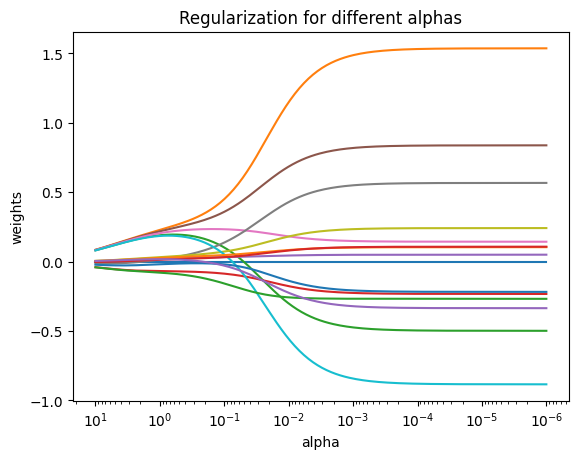

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

df_heidelbeeren = pd.read_csv('heidelbeere_train.csv')

n_alphas = 200
alphas = np.logspace(-6, 1, n_alphas)

weights = []

X_train = df_heidelbeeren[['Samen', 'Fruchtmasse', 'Klongrösse', 'Honigbiene']]
y_train = df_heidelbeeren['Ertrag'].values

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression(learning_rate=0.1, verbose=False))
])

for alpha in alphas:
    pipeline.named_steps['regressor'].alpha = alpha
    _ = pipeline.fit(X_train, y_train)
    weights.append(pipeline.named_steps['regressor'].w_[1:])

ax = plt.gca()
_ = ax.plot(alphas, weights)
ax.set_xscale("log")
_ = ax.set_xlim(ax.get_xlim()[::-1])
_ = plt.xlabel("alpha")
_ = plt.ylabel("weights")
_ = plt.title("Regularization for different alphas")
_ = plt.axis("tight")
plt.show()

Interpretieren Sie den Plot. Was sieht man und warum sieht es so aus?

Für diese Aufgabe habe ich für 200 $alpha$-Werte zwischen $10^{-6}$ und $10^{1}$ das Modell trainiert und die resultierenden Gewichte angeschaut (die 200 Werte sind logarithmisch gleichverteilt). Sämtliche kleineren $alpha$-Werte als $10^{-6}$ führen zu keinen grossen Veränderungen an den Gewichten.

Man kann dem Plot entnehmen, dass grosse $alpha$-Werte dazu führen, dass die Gewichten gegen $0$ tendieren. Je kleiner die $alpha$-Werte werden (je weiter rechts im Plot), desto grösser werden die Absolutwerte der Gewichte. Dies passiert, da der Absolutwert des Gradienten durch hohe $alpha$-Werte grösser wird (siehe `gradient = self.alpha * self.w_`) und somit die Gewichte stärker angepasst werden. Bei kleinen $alpha$-Werten ist der Absolutwert des Gradienten kleiner und die Gewichte werden weniger stark angepasst und bleiben somit grösser (als Absolutwert betrachtet).

## Aufgabe 4 (8 Punkte)

In dieser Aufgabe geht es darum ein best mögliches Modell zu finden.


### Aufgabe 4a

- Entwickeln Sie nun ein multiples lineares Regressionsmodell für die Zielgrösse `Ernte`.
- Sie dürfen durch Feature-Transformation beliebige weitere Attribute hinzufügen.
- Trainieren Sie das Modell mit dem Trainings-Datensatz. 
- Evaluieren Sie das beste Modell auf dem Trainings- und auf dem Testdatensatz.

Hinweis: In dieser Aufgabe geht es darum ein möglichst gutes Modell zu finden. Sie sollen demonstrieren, dass Sie in der Lage sind verschiedene Modell-Varianten miteinander zu vergleichen und die beste Variante auszuwählen. Ein ideales Instrument ist Kreuzvalidierung. Lesen Sie dazu die folgende Dokumentation: [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html). Verwenden Sie [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) um verschiedene Modelle miteinander zu vergleichen. 

Verwenden Sie geeignete Instrumente von sklearn, wie z.B.:
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [sklearn.compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose)

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import warnings
warnings.filterwarnings('ignore', category=UserWarning, message="One or more of the test scores are non-finite")
warnings.filterwarnings('ignore', category=UserWarning, message="Scoring failed.")

df_heidelbeeren = pd.read_csv('heidelbeere_train.csv')
df_heidelbeeren_test = pd.read_csv('heidelbeere_test.csv')

feature_variables_sets = [
    ['Samen', 'Fruchtmasse', 'Klongrösse', 'Honigbiene'], # feature set from A3
    ['Samen', 'Fruchtmasse', 'Fruchtansatz'], # best correlations with Ertrag
    ['Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse'],
    ['Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse', 'Hummeln'],
    ['Klongrösse', 'Honigbiene', 'Hummeln', 'AvgTempHoch', 'AvgTief', 'Regentage', 'Fruchtansatz', 'Fruchtmasse', 'Samen'] # all features
]

y_train = df_heidelbeeren['Ertrag'].values
y_test = df_heidelbeeren_test['Ertrag'].values

df_model_results = pd.DataFrame(columns=['variables', 'best_params', 'train_cost', 'train_r2', 'test_cost', 'test_r2'])

model_pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression(verbose=False))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'regressor__learning_rate': np.linspace(0.1, 1, 5),
    'regressor__alpha': np.hstack([[0], np.logspace(-10, -3, 5)]),
    'regressor__optimization_method': ['bgd', 'sgd'],
    'regressor__max_num_steps': [1000, 2000, 5000], # higher values exceed the time limit
}

for variables in feature_variables_sets:

    X_train = df_heidelbeeren[variables]
    X_test = df_heidelbeeren_test[variables]

    grid_search = GridSearchCV(model_pipeline, param_grid, n_jobs=-1)
    _ = grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_model_regressor = best_model.named_steps['regressor']

    X_train_transformed, X_test_transformed = X_train, X_test
    for _, step in best_model.steps[:-1]:
        X_train_transformed = step.transform(X_train_transformed)
        X_test_transformed = step.transform(X_test_transformed)

    new_model_row = {
        'variables': variables,
        'best_params': grid_search.best_params_,
        'train_cost': best_model_regressor.cost(X_train_transformed, y_train),
        'train_r2': best_model_regressor.score(X_train_transformed, y_train),
        'test_cost': best_model_regressor.cost(X_test_transformed, y_test),
        'test_r2': best_model_regressor.score(X_test_transformed, y_test)
    }
    df_model_results.loc[len(df_model_results)] = new_model_row

    print(f"Variables: {variables} done")

for param in param_grid.keys():
    param_name = param.split('__')[-1]
    df_model_results[param_name] = df_model_results['best_params'].apply(lambda x: x[param])

df_model_results.drop(columns=['best_params'], inplace=True)

# get value with highest test_r2
overall_best_model_vals = df_model_results.loc[df_model_results['test_r2'].idxmax()]

print("\nModel Results:")
pd.set_option('display.max_colwidth', 100)
display(df_model_results)

print("Bestes Modell:\n")
print(f"Variables: {overall_best_model_vals['variables']}")

print("Train:")
print(f" - R^2 is: {overall_best_model_vals['train_r2']:.3f}")
print(f" - cost is {overall_best_model_vals['train_cost']:.3f}")

print("Test")
print(f" - R^2 is: {overall_best_model_vals['test_r2']:.3f}")
print(f" - cost is {overall_best_model_vals['test_cost']:.3f}")

Variables: ['Samen', 'Fruchtmasse', 'Klongrösse', 'Honigbiene'] done
Variables: ['Samen', 'Fruchtmasse', 'Fruchtansatz'] done
Variables: ['Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse'] done
Variables: ['Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse', 'Hummeln'] done
Variables: ['Klongrösse', 'Honigbiene', 'Hummeln', 'AvgTempHoch', 'AvgTief', 'Regentage', 'Fruchtansatz', 'Fruchtmasse', 'Samen'] done

Model Results:


,variables,train_cost,train_r2,test_cost,test_r2,degree,learning_rate,alpha,optimization_method,max_num_steps
0,"[Samen, Fruchtmasse, Klongrösse, Honigbiene]",0.022170,0.976690,0.024425,0.972886,2,0.100,0.000018,bgd,5000
1,"[Samen, Fruchtmasse, Fruchtansatz]",0.016279,0.982565,0.015592,0.982399,2,0.100,0.000000,bgd,5000
2,"[Samen, Fruchtmasse, Fruchtansatz, Regentage, Klongrösse]",0.010311,0.988957,0.012196,0.986233,2,0.100,0.000000,bgd,5000
3,"[Samen, Fruchtmasse, Fruchtansatz, Regentage, Klongrösse, Hummeln]",0.009012,0.990348,0.012030,0.986421,2,0.100,0.000000,bgd,5000
4,"[Klongrösse, Honigbiene, Hummeln, AvgTempHoch, AvgTief, Regentage, Fruchtansatz, Fruchtmasse, Sa...",0.013492,0.985929,0.013148,0.985558,1,0.325,0.000018,bgd,5000


Bestes Modell:

Variables: ['Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse', 'Hummeln']
Train:
 - R^2 is: 0.990
 - cost is 0.009
Test
 - R^2 is: 0.986
 - cost is 0.012


### Aufgabe 4b

Interpretieren Sie das Ergebnis:

- Welche Modell-Varianten haben Sie verglichen? Welche ist die beste?
- Vergleichen und interpretieren Sie Scores auf Test- und Trainingsdatensatz. Wie schneidet das Modell zu den besten Modellen aus Aufgabe 3 ab?

#### Verwendete Features/Hyperparameter

Folgende Feature Kombinationen wurden getestet. Es wurden bewusst diese Features gewählt, welche bei Aufgabe 1 eine hohe Korrelation mit dem Ertrag aufgewiesen haben.

- `'Samen', 'Fruchtmasse', 'Klongrösse', 'Honigbiene'`
- `'Samen', 'Fruchtmasse', 'Fruchtansatz'`
- `'Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse'`
- `'Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse', 'Hummeln'`
- `'Klongrösse', 'Honigbiene', 'Hummeln', 'AvgTempHoch', 'AvgTief', 'Regentage', 'Fruchtansatz', 'Fruchtmasse', 'Samen'`

Folgende Hyperparameter wurden getestet:

- `PolynomialFeature.degree`: $\{ 1, 2, 3 \}$
- `LinearRegression.learning_rate`-Werte: $5$ Werte zwischen $0.1$ und $1.0$ (linear gleichverteilt)
- `LinearRegression.alpha`-Werte: $5$ Werte zwischen $10^{-6}$ und $10^{-3}$ (logarithmisch gleichverteilt) und der Wert $0$\
  Während den verschiedenen Versuchen wurde festgestellt, dass der Wert $0$ für `alpha` die besten Resultate liefert, weshalb $0$ in der Params-Liste ergänzt wurde.
- `LinearRegression.optimization_method`: `{ "bgd", "sgd" }`
- `LinearRegression.max_num_steps`: $\{ 1000, 2000, 5000 \}$

Zusätzlich wurde auch noch die Verwendung vom `StandardScaler` vor dem `PolynomialFeature` getestet (andere Reihenfolge). Diese Anpassung führte zu ähnlichen Resultaten. Allerdings waren de andere Hyperparameter-Kombinationen erfolgreicher (es war vor allem festzustellen, dass da der `degree` immer $1$ war).

#### Bestes Ergebniss

Die besten Resultate erreichte ich mit folgender Kombination:

- Features: `'Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse', 'Hummeln'`
- `PolynomialFeature.degree`: $2$
- `LinearRegression.learning_rate`: $0.1$
- `LinearRegression.alpha`: $0$
- `LinearRegression.optimization_method`: `"bgd"`
- `LinearRegression.max_num_steps`: $5000$

Daraus resultierten folgende Werte:

Trainingsdaten:

 - $R^2$: $0.990$
 - Kosten: $0.009$
  
Testdaten:

 - $R^2$: $0.986$
 - Kosten: $0.012$

#### Vergleich der Modelle

Der $R^2$-Wert ist bei allen Modellen sehr hoch (über $0.97$) und dies für die Trainings- sowie Testdaten. Das beste Modell hat einen $R^2$-Wert von $0.986$ bei den Testdaten erreicht. Den tiefsten $R^2$-Score von $0.97$ (für Trainings- und Testdaten) hat das Modell mit den Features `'Samen', 'Fruchtmasse', 'Klongrösse', 'Honigbiene'` erreicht. Diese Feature-Kombination stammt so aus Aufgabe 3c.

Die Kosten sind bei allen Modellen sehr tief. 4 von 5 Modellen haben Kosten unter $0.2$ (für Trainings- und Testdaten) erreicht. Das Modell mit den Features `'Samen', 'Fruchtmasse', 'Klongrösse', 'Honigbiene'` (Feature-Kombination aus Aufgabe 3c) erreicht mit Kosten von ca. $0.02$ (für Trainings- und Testdaten) den höchsten Wert.

Insgesamt zeigen die errechten Werte, dass sich die Daten sehr gut modellieren lassen und die Vorhersagen sehr genau sind.

#### Vergleich zu Aufgabe 3:

Das beste Modell aus Aufgabe 4 schnitt besser ab als die besten Modelle aus Aufgabe 3 (berücksichtigt wurden die Aufgaben 3 a - d). Die Kosten sind generell tiefer und der $R^2$-Wert höher. Die einzige Ausnahme bildet die Aufgabe 3d. Da habe ich mit Stochastic-Gradient-Descent auch teilweise deutlich tiefere Kosten ($0.001$) erhalten - jedoch war der $R^2$ Score dennoch immer tiefer. Diese tiefen Kosten sind aufgrund der starken Schwankungen des Gradienten bei der SGD-Methode zu erklären.

## Aufgabe 5 (2 Punkte)

In dieser Aufgabe geht es darum die Ergebnisse der einzelnen Teilaufgaben zu konsolidieren und ein Fazit zu ziehen.

### Aufgabe 5a

Beantworten Sie folgende Fragen:

- Wie schätzen Sie den Modellierungserfolg ein? Ist das Modell gut oder schlecht? Begründen Sie Ihre Antwort.

- Alex soll in einem nächsten Projekt herausfinden, welche Einflussgrössen wichtig sind. Was können Sie dazu bereits sagen?


Das Modell aus Aufgabe 4 ist sehr gut. Der hohe $R^2$-Wert deutet darauf hin, dass das Modell die Daten sehr gut abbildet und die Beziehung zwischen den Features und dem Ertrag erkannt wurden. Anhand der Kosten kann man erkennen, dass die vorhergesagten Werten den tatsächlichen Werten entsprechen. Da die erzielten Kosten sowie der $R^2$-Wert zwischen Trainings- und Testdaten sehr ähnlich sind, kann man davon ausgehen, dass im Modell keine Overfitting-Probleme vorhanden sind.

Die Variablen `'Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse', 'Hummeln'` haben bei Aufgabe 4 zum besten Resultat geführt. Diese Features haben bei Aufgabe 1 auch die höchste Korrelation mit dem Ertrag aufgewiesen. Obwohl ich zuerst dachte (siehe Aufgabe 1b), dass die Features `'Samen', 'Fruchtmasse', 'Fruchtansatz'` allein den besten Wert erzielen würden, war es erfolgreicher, diese mit anderen Features zu kombinieren. Schliesslich habe ich alle Features verwendet, welche eine Korrelation von mehr als $0,3$ mit dem Ertrag aufgewiesen haben. Somit sind die wichtigen Einflussgrössen folgende: `'Samen', 'Fruchtmasse', 'Fruchtansatz', 'Regentage', 'Klongrösse', 'Hummeln'`.